# Paper 1 (Gradient Boosting Regressor)
Link to [paper](https://www.scirp.org/pdf/ojs_2021031710152209.pdf)

In [1]:
# Import libraries and configure
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

In [2]:
# Load dataset
filename = "winequality-white.csv"
data = pd.read_csv(filename, delimiter=";")

## Exploratory Data Analysis

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


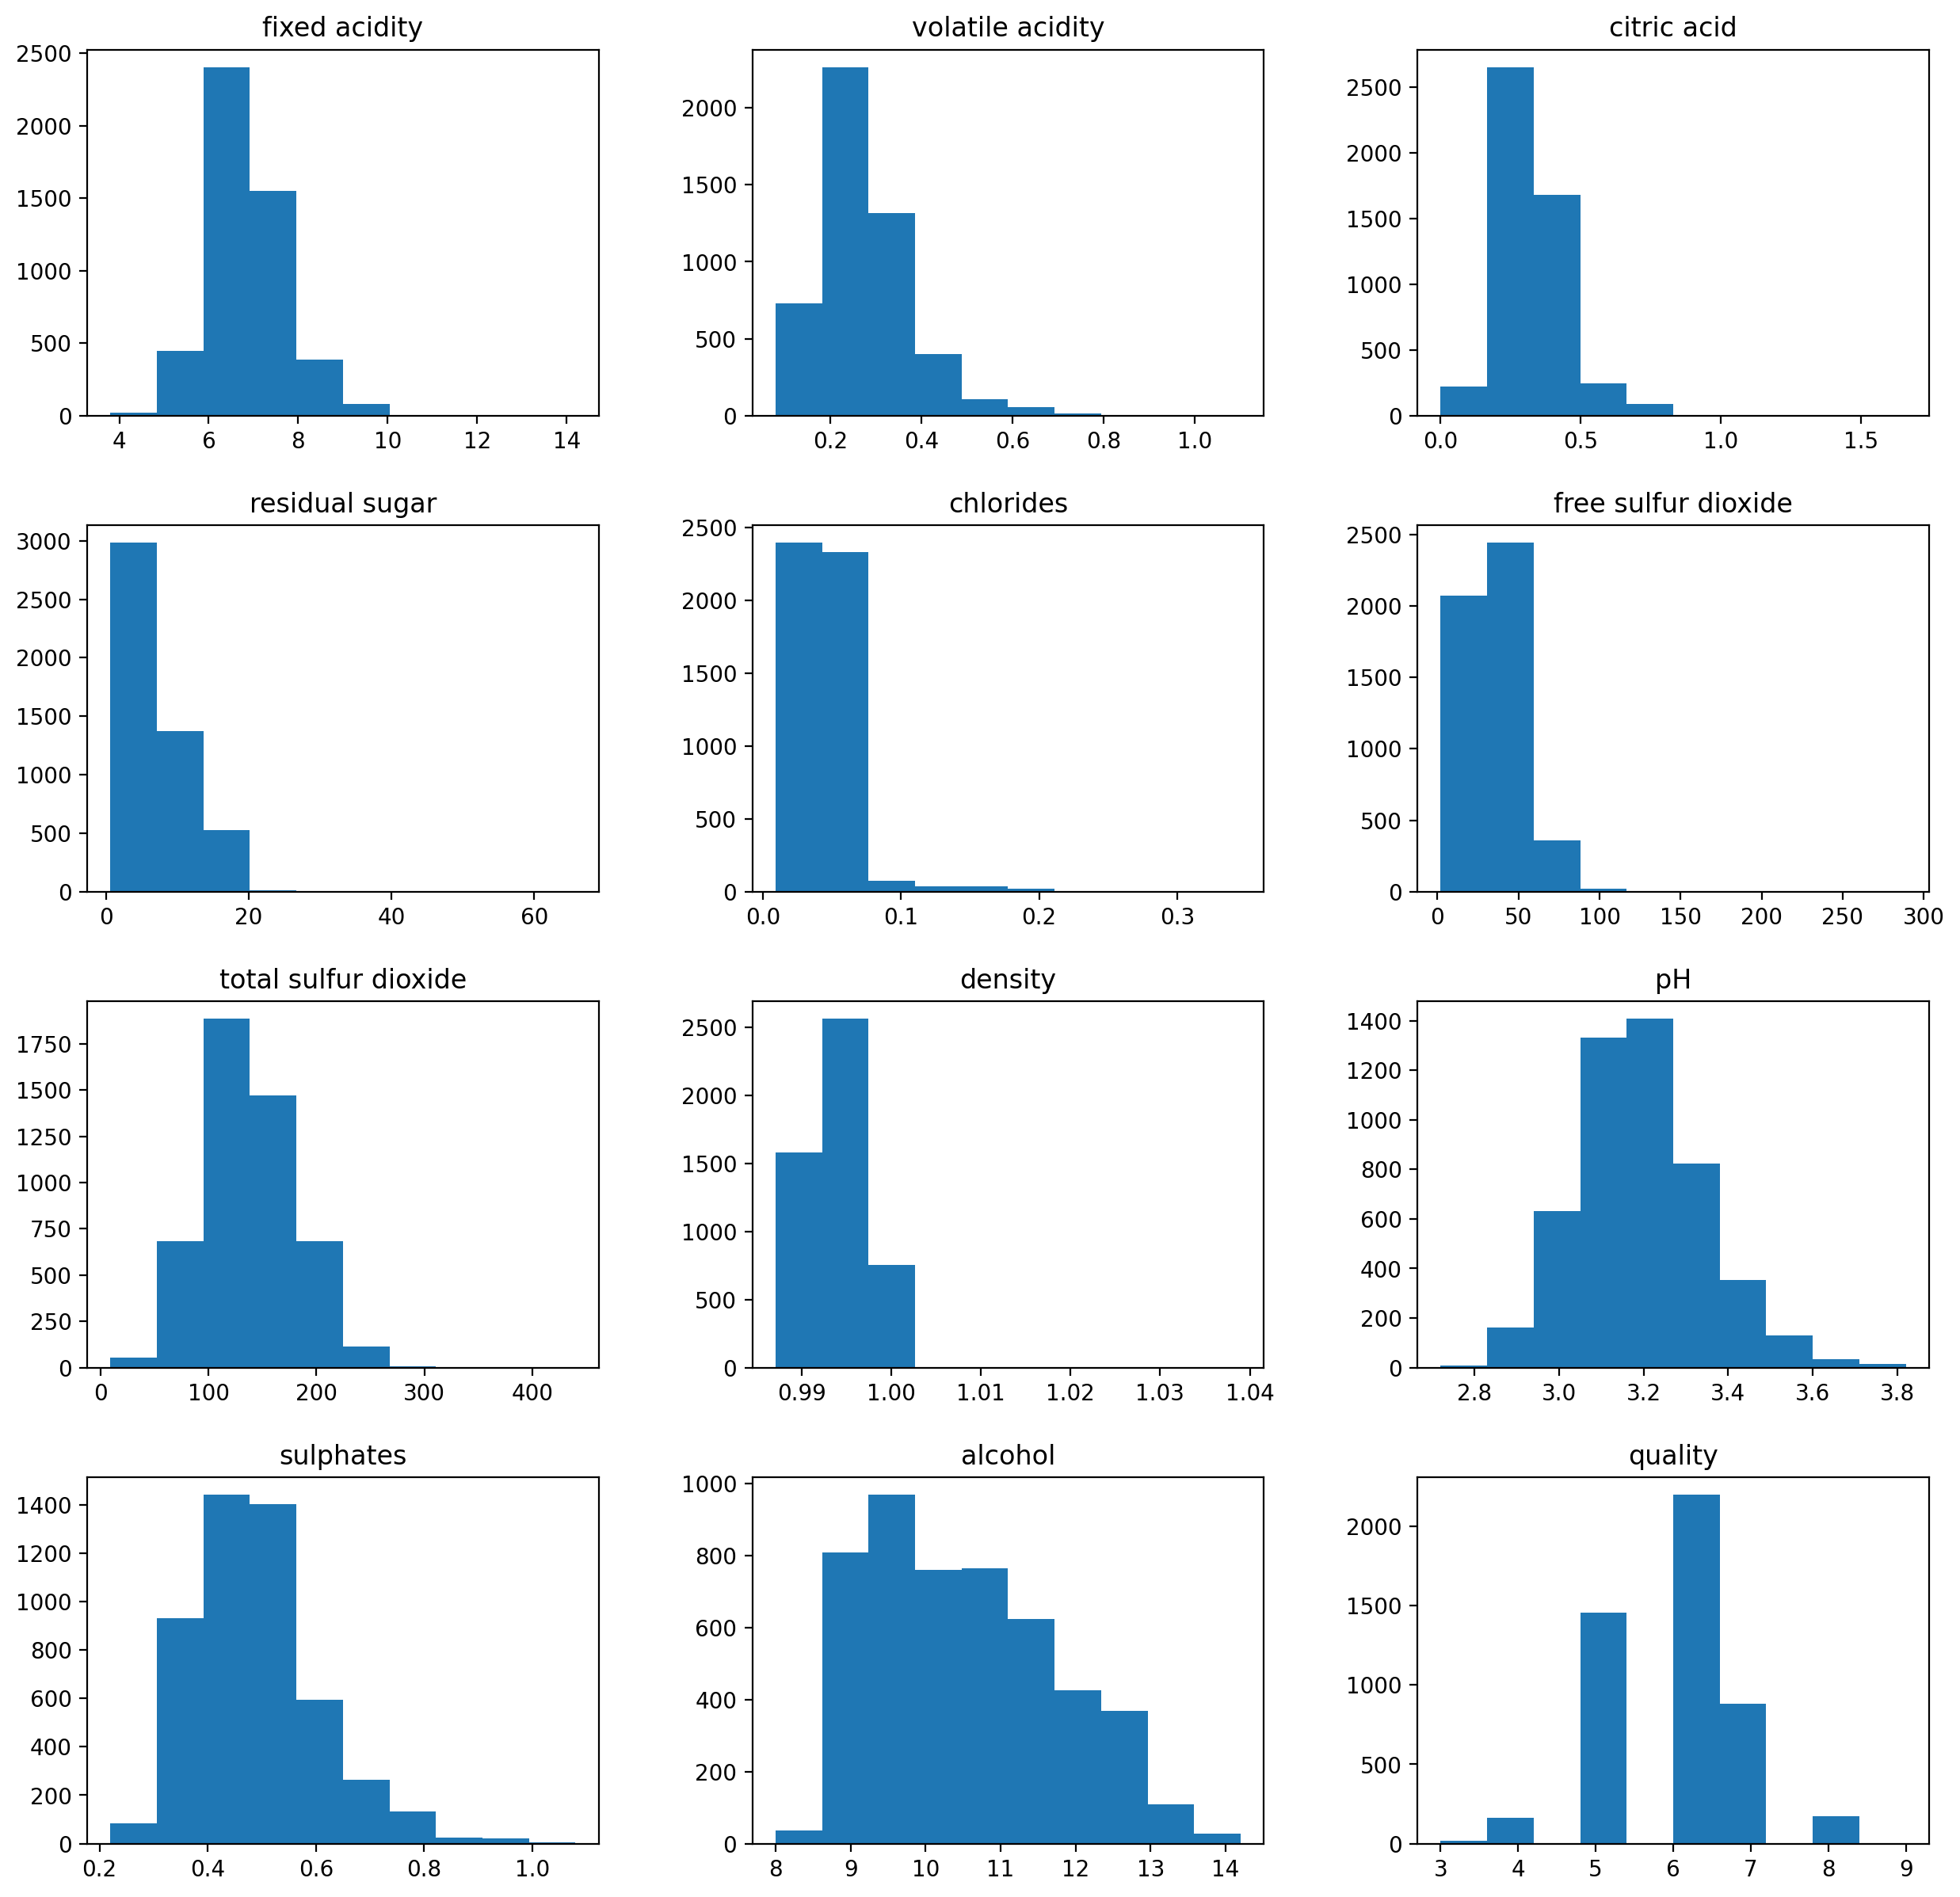

In [6]:
# Histogram of all columns
hist = data.hist(figsize=(15, 15), grid=False)

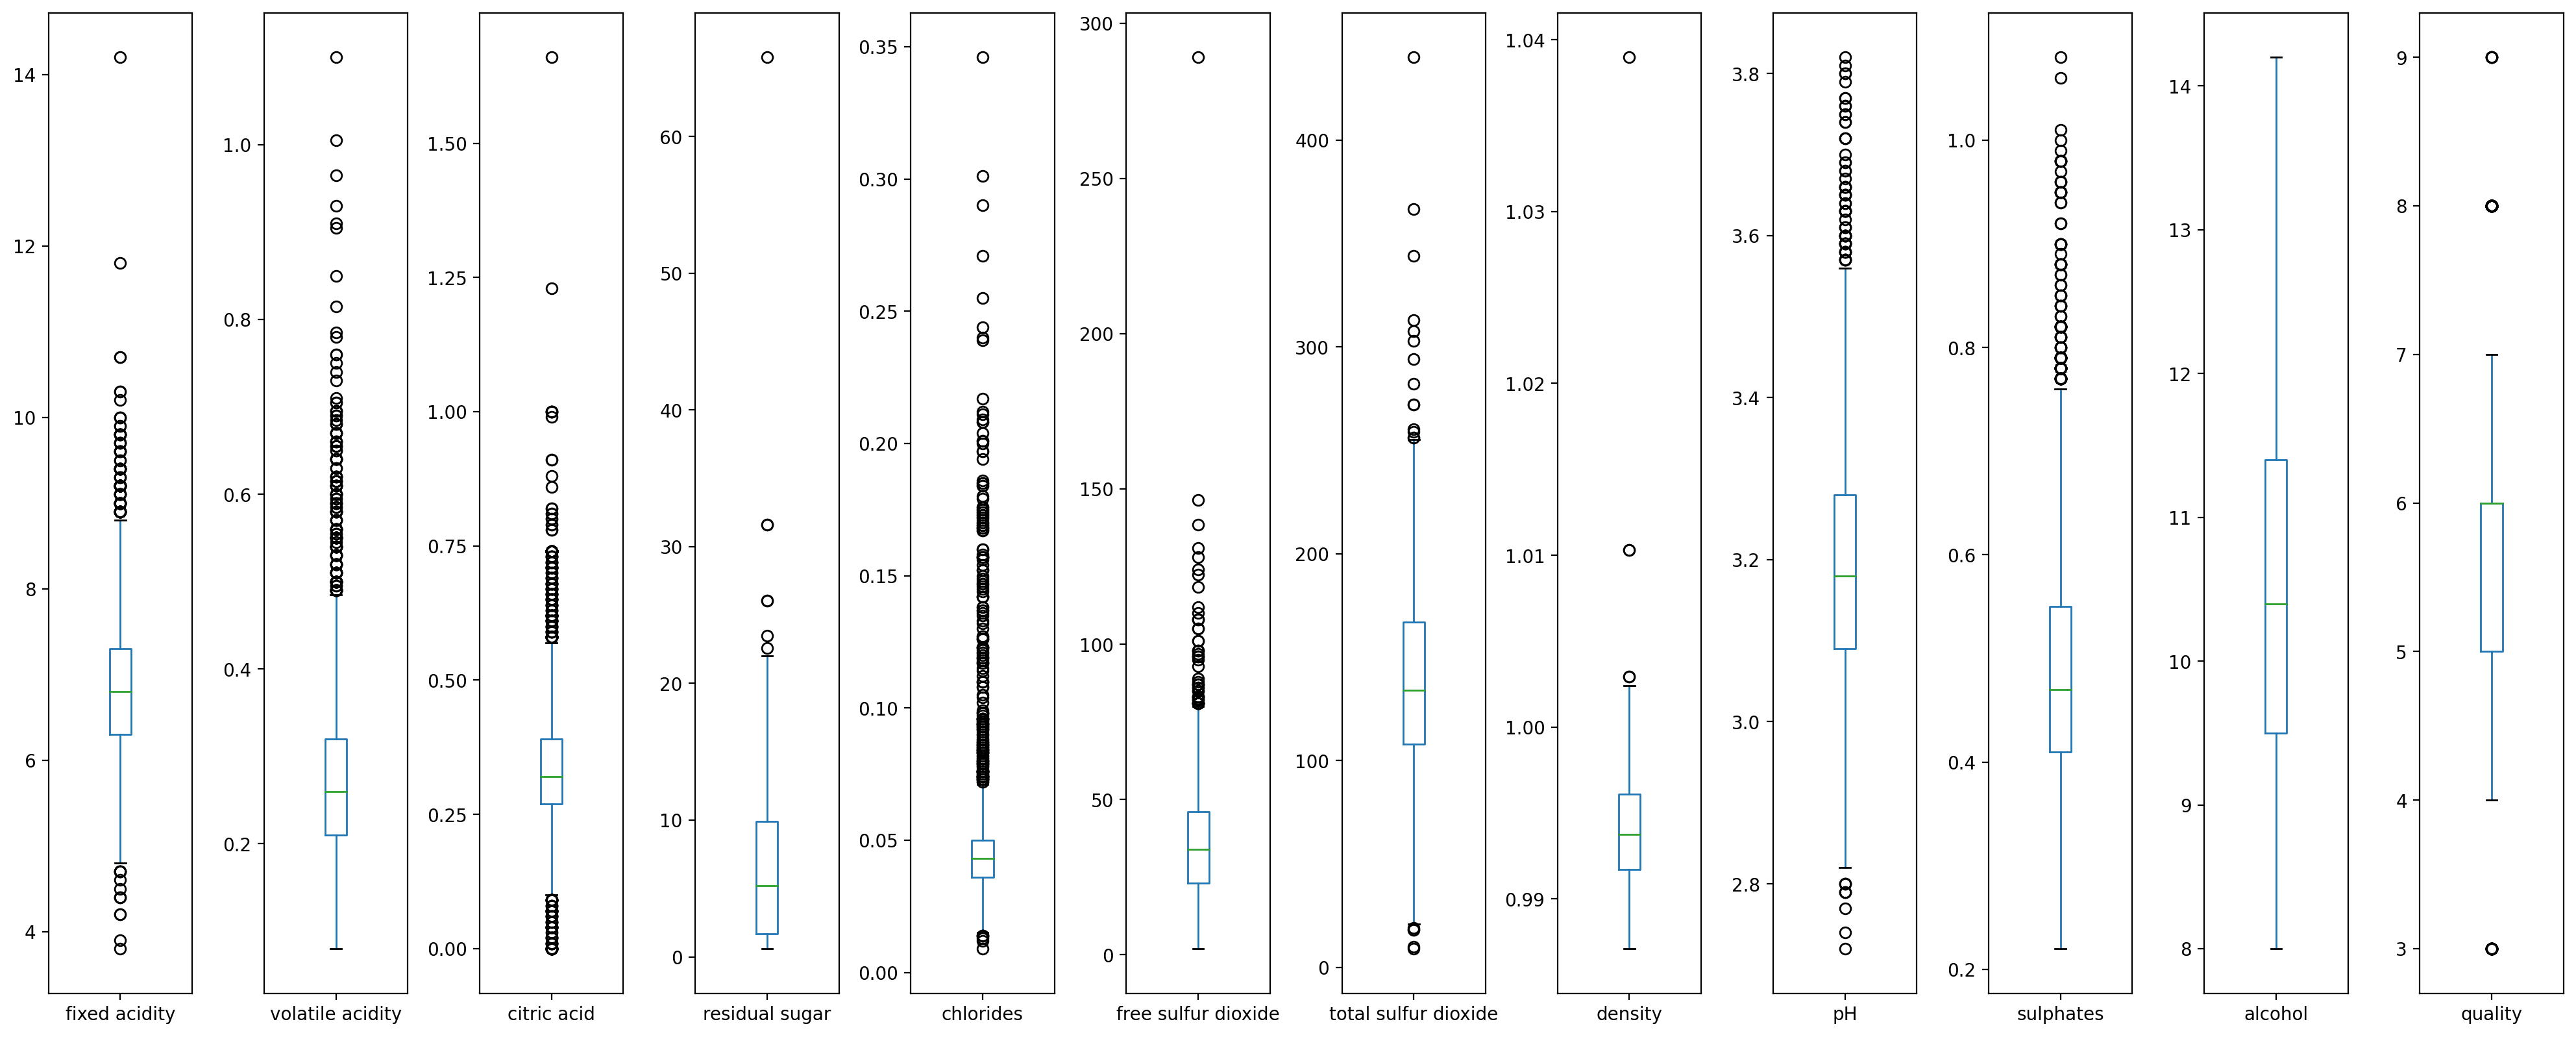

In [7]:
# Boxplot of all columns
boxplot = data.plot(kind='box', subplots=True, sharey=False, figsize=(25, 10), grid=False)

plt.subplots_adjust(wspace=0.5) 
plt.show()

<AxesSubplot:>

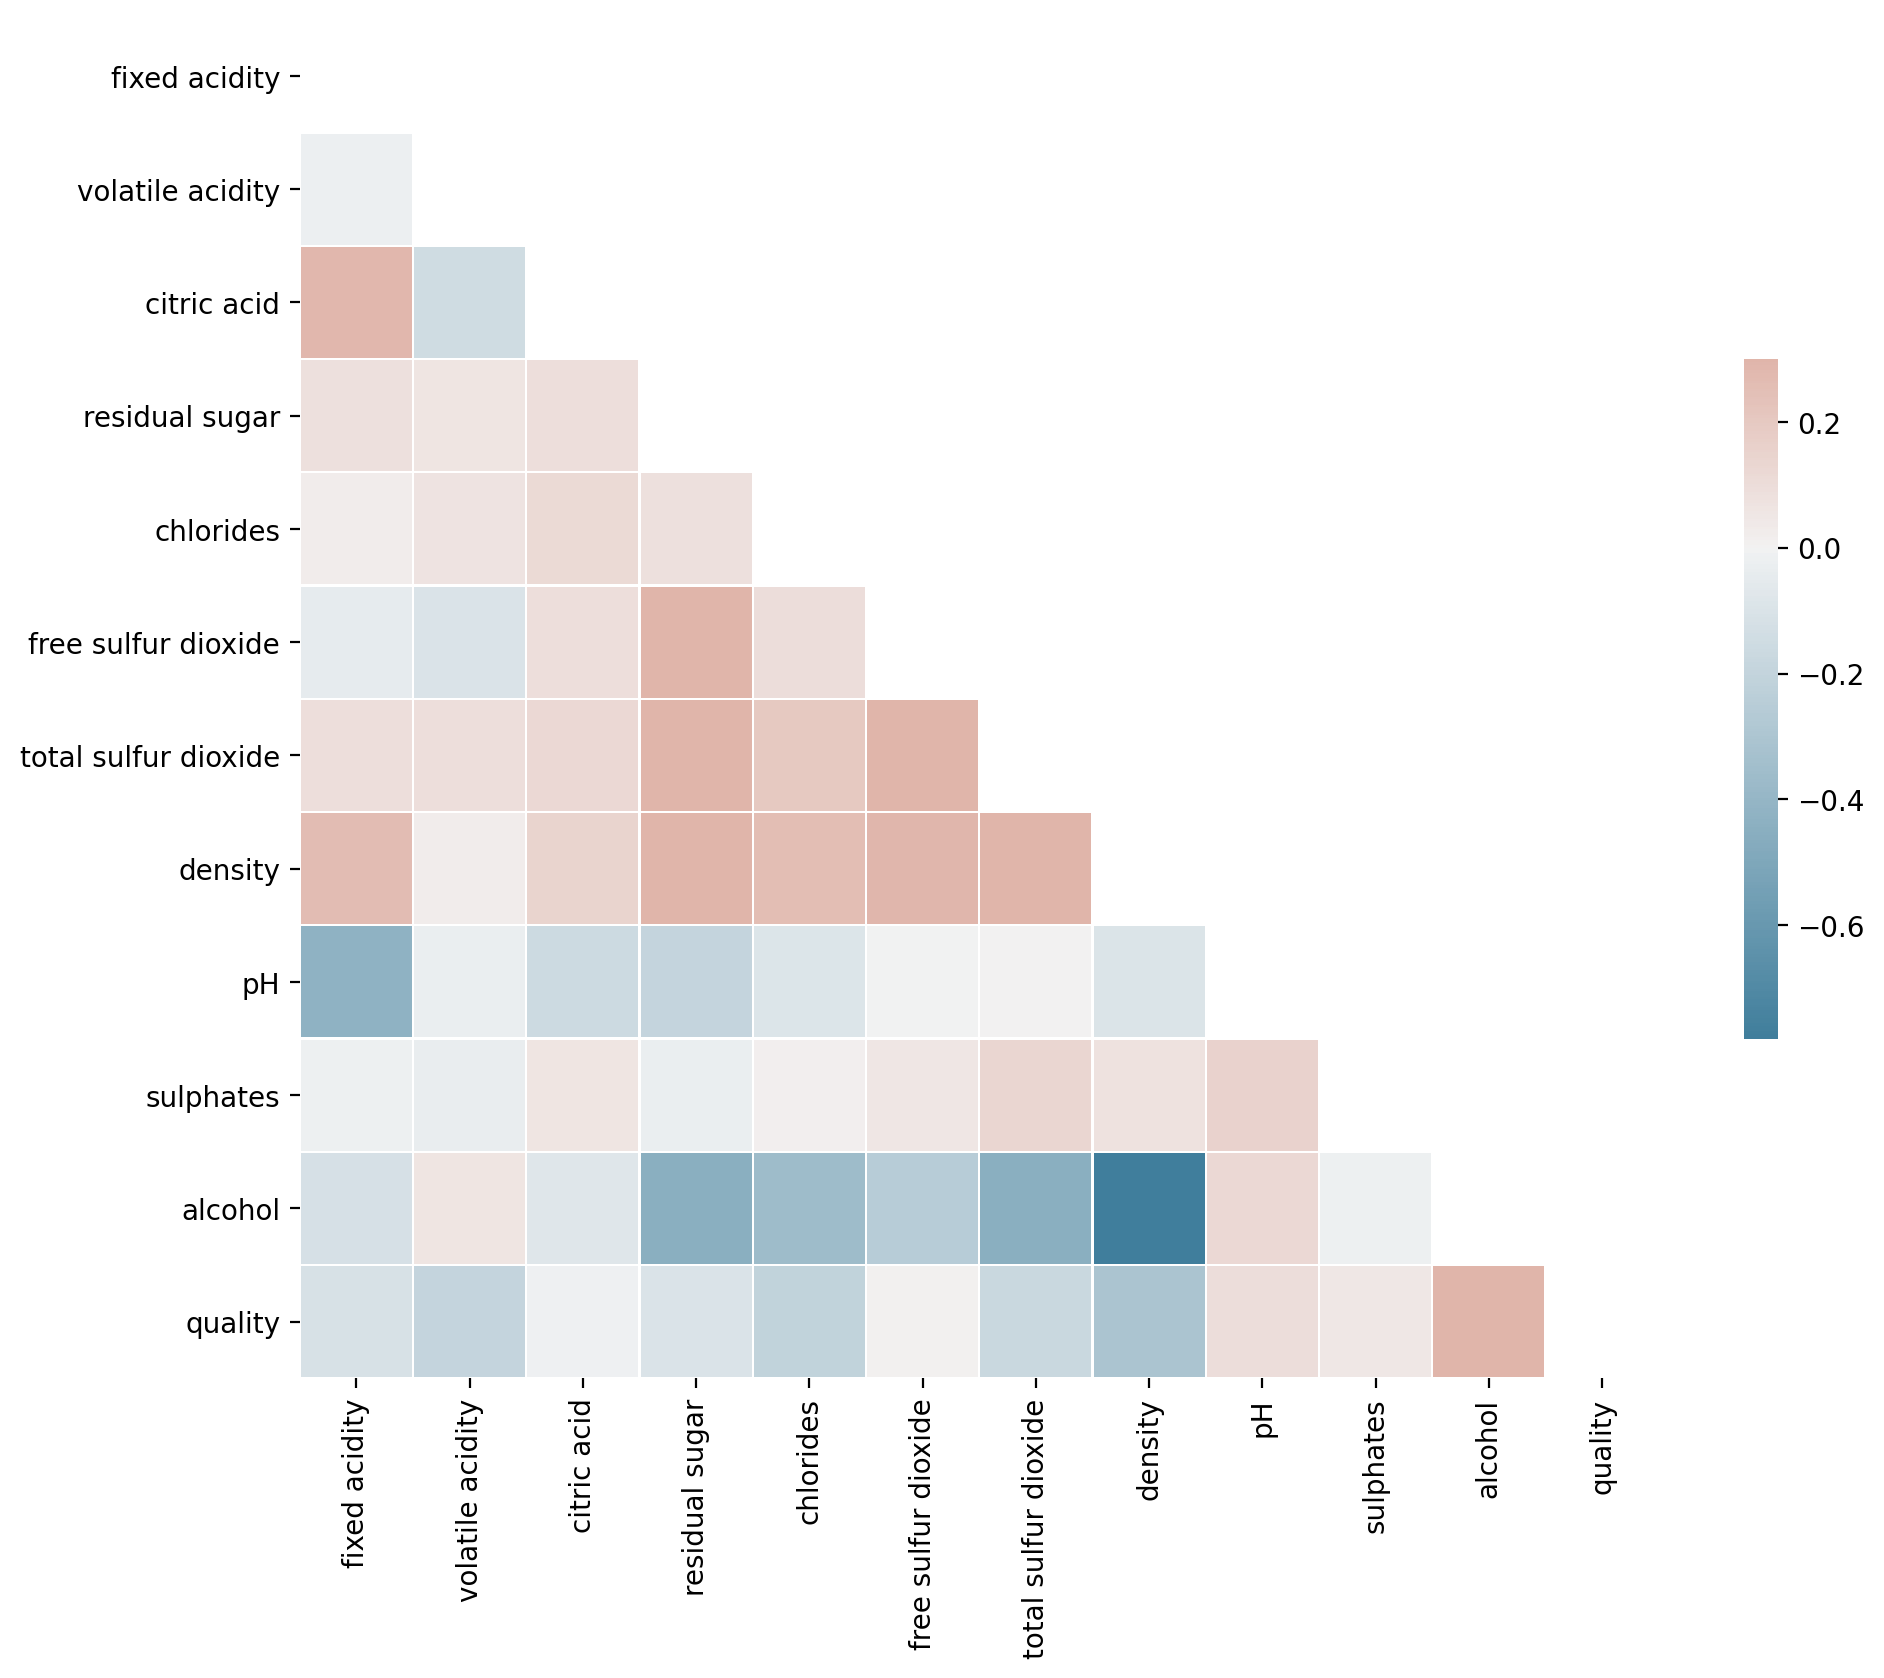

In [47]:
# Feature correlation
import seaborn as sns

corr = data.corr()

# Inspired by https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Implementing the model as described

In [8]:
# Split data into features and target

features = data.drop('quality', axis=1)
feature_labels = features.columns.values

target = data['quality']

In [9]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)

features = scaler.transform(features)

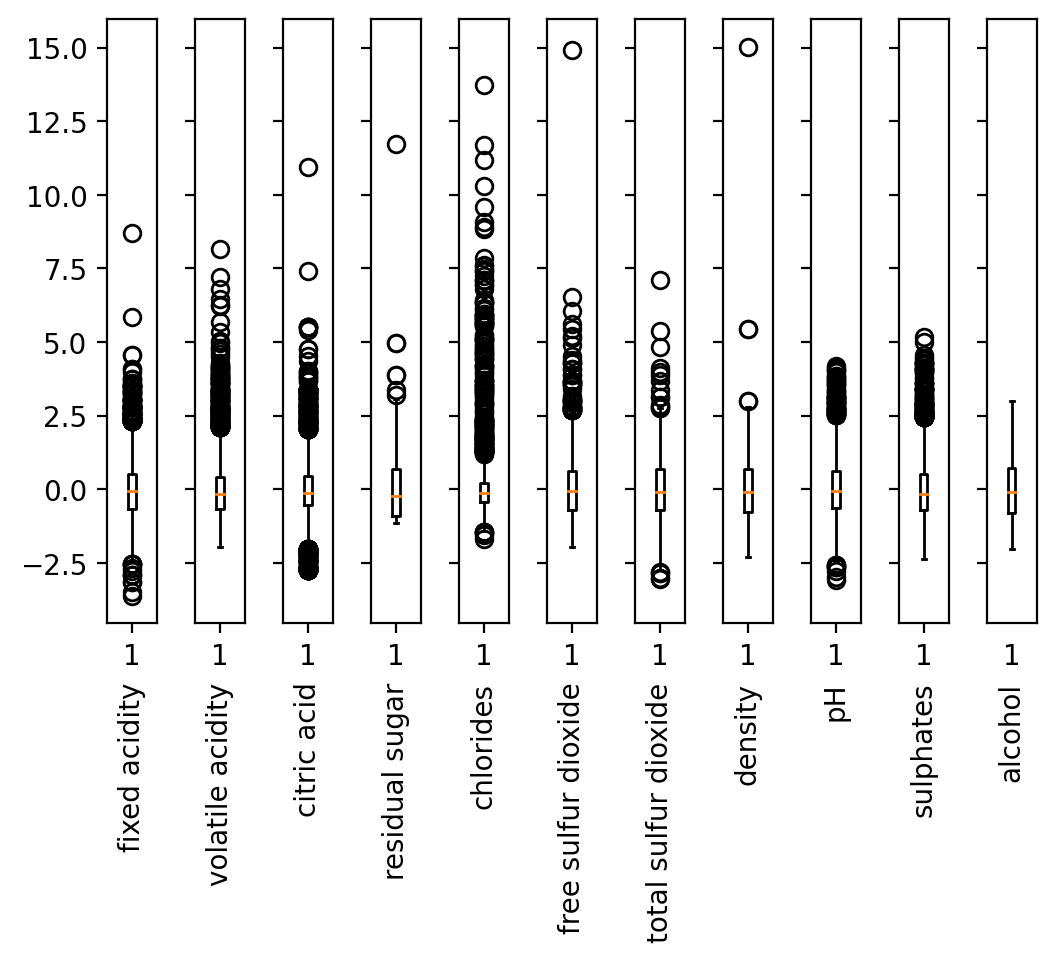

In [10]:
# Boxplot of all columns
fig, axs = plt.subplots(1, 11, sharey=True)

for col in range(features.shape[1]):
    axs[col].boxplot(features[:, col])
    axs[col].set_xlabel(feature_labels[col], rotation=90)

plt.subplots_adjust(wspace=0.75) 
plt.tick_params(bottom=False)
plt.show()

In [11]:
# Data partition
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(features, target, test_size=0.25, random_state=0)

In [12]:
# Model tuning to find optimal parameters
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

parameters = {
    "loss": ["ls"],
    "n_estimators": [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200],
    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.125, 0.15, 0.175, 0.2]
}

rgr = GridSearchCV(GradientBoostingRegressor(random_state=0), parameters, cv=10, scoring="neg_mean_squared_error", verbose=2, refit=False, n_jobs=-1)
rgr.fit(X_train, y_train)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1, 0.125, 0.15,
                                           0.175, 0.2],
                         'loss': ['ls'],
                         'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 125, 150, 175, 200]},
             refit=False, scoring='neg_mean_squared_error', verbose=2)

In [13]:
grid_search_cv_results = pd.DataFrame.from_dict(rgr.cv_results_)
best_params = grid_search_cv_results[grid_search_cv_results.rank_test_score == grid_search_cv_results.rank_test_score.min()]

print(best_params)
# Best parameters -> learning_rate of 0.2 and n_estimators 200

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
179       1.644702      0.045851         0.002765        0.000736   

    param_learning_rate param_loss param_n_estimators  \
179                0.15         ls                200   

                                                params  split0_test_score  \
179  {'learning_rate': 0.15, 'loss': 'ls', 'n_estim...           -0.39518   

     split1_test_score  ...  split3_test_score  split4_test_score  \
179          -0.446391  ...          -0.473983          -0.433937   

     split5_test_score  split6_test_score  split7_test_score  \
179          -0.456917          -0.493059          -0.492486   

     split8_test_score  split9_test_score  mean_test_score  std_test_score  \
179          -0.367627           -0.47769        -0.439835        0.046887   

     rank_test_score  
179                1  

[1 rows x 21 columns]


In [14]:
# Build the model
# The paper uses squared loss as the loss function, learning rate of 0.05, and number of estimators = 40.

gbr = GradientBoostingRegressor(loss='ls', n_estimators=40, learning_rate=0.05, random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=40, random_state=0)

In [15]:
# Evaluate model on the test set
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error

y_pred = gbr.predict(X_test)

print("R =", explained_variance_score(y_test, y_pred))
print("R2 =", r2_score(y_test, y_pred))
print("MSE =", mean_squared_error(y_test, y_pred))
print("MAPE =", mean_absolute_percentage_error(y_test, y_pred))


R = 0.2773465833083866
R2 = 0.27106476623870623
MSE = 0.610083269865887
MAPE = 0.11284310785138392


In [16]:
# Evaluate the model on training set

y_train_pred = gbr.predict(X_train)

print("R =", explained_variance_score(y_train, y_train_pred))
print("R2 =", r2_score(y_train, y_train_pred))
print("MSE =", mean_squared_error(y_train, y_train_pred))
print("MAPE =", mean_absolute_percentage_error(y_train, y_train_pred))

R = 0.36611354823071474
R2 = 0.3661135482307146
MSE = 0.4851333193331038
MAPE = 0.09685891458672591


Text(0.5, 1.0, 'Gradient Boosting Regressor Feature Importance')

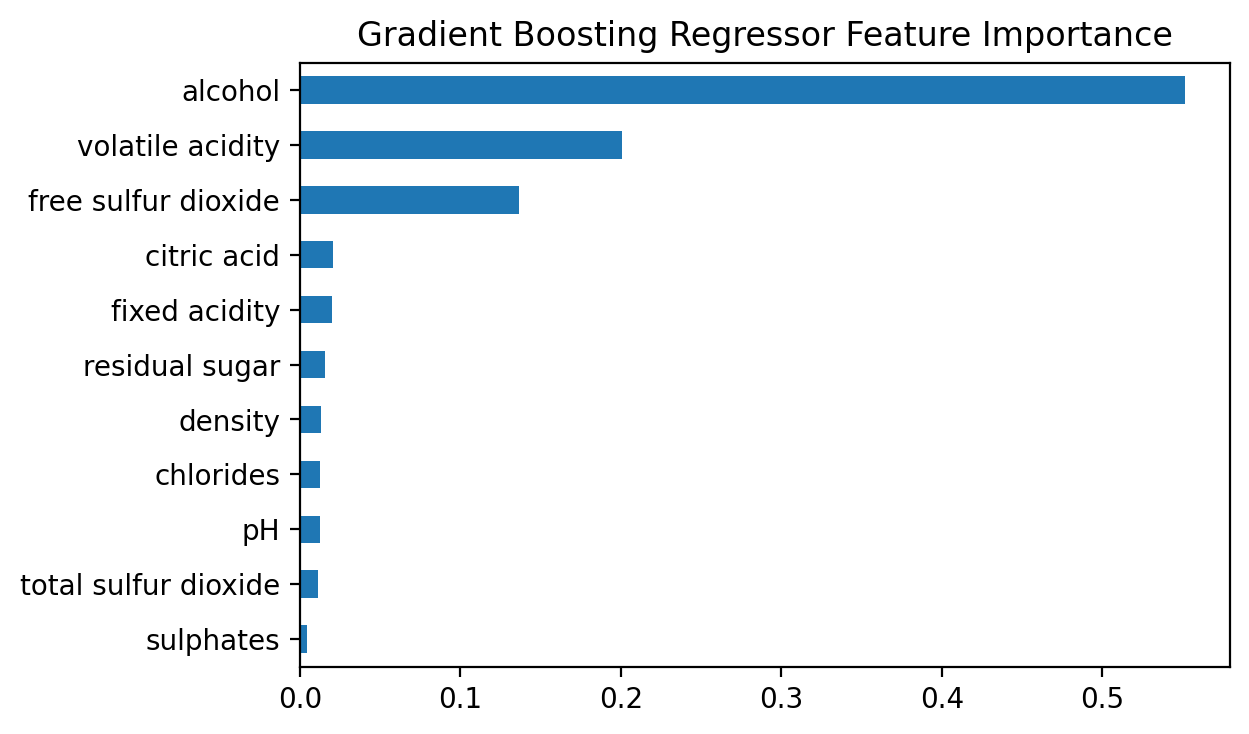

In [17]:
# View feature importance
feature_importance = pd.Series(gbr.feature_importances_, index=feature_labels)

feature_importance.sort_values().plot(kind="barh")
plt.title('Gradient Boosting Regressor Feature Importance')

## Implementing model modifications

In [24]:
parameters = {
    "loss": ["ls"],
    "n_estimators": [40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 350, 400, 450, 500],
    "learning_rate": [0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3],
    "max_depth": [3, 4, 5],
    "min_samples_leaf": [1, 3, 5]
}

rgr = GridSearchCV(GradientBoostingRegressor(random_state=0), parameters, cv=5, scoring="neg_mean_squared_error", verbose=2, refit=False, n_jobs=-1)
rgr.fit(X_train, y_train)

Fitting 5 folds for each of 1197 candidates, totalling 5985 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2, 0.25,
                                           0.3],
                         'loss': ['ls'], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [40, 50, 60, 70, 80, 90, 100, 125, 150,
                                          175, 200, 225, 250, 275, 300, 350,
                                          400, 450, 500]},
             refit=False, scoring='neg_mean_squared_error', verbose=2)

In [25]:
grid_search_cv_results = pd.DataFrame.from_dict(rgr.cv_results_)
best_params = grid_search_cv_results[grid_search_cv_results.rank_test_score == grid_search_cv_results.rank_test_score.min()]

print(best_params)
# Best parameters -> learning_rate of 0.2 and n_estimators 200

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
151        8.39193       0.17047         0.019926        0.004799   

    param_learning_rate param_loss param_max_depth param_min_samples_leaf  \
151                 0.1         ls               5                      3   

    param_n_estimators                                             params  \
151                500  {'learning_rate': 0.1, 'loss': 'ls', 'max_dept...   

     split0_test_score  split1_test_score  split2_test_score  \
151          -0.357628          -0.399266          -0.448614   

     split3_test_score  split4_test_score  mean_test_score  std_test_score  \
151          -0.470574          -0.344037        -0.404024        0.049378   

     rank_test_score  
151                1  


In [36]:
modified_gbr = GradientBoostingRegressor(loss='ls', n_estimators=500, learning_rate=0.1, max_depth=5, min_samples_leaf=3, random_state=0)
modified_gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=3, n_estimators=500,
                          random_state=0)

In [37]:
# Evaluate the model on the test set
modified_y_pred = modified_gbr.predict(X_test)

print("R =", explained_variance_score(y_test, modified_y_pred))
print("R2 =", r2_score(y_test, modified_y_pred))
print("MSE =", mean_squared_error(y_test, modified_y_pred))
print("MAPE =", mean_absolute_percentage_error(y_test, modified_y_pred))

R = 0.44662570506008026
R2 = 0.44090745362078043
MSE = 0.4679332169096081
MAPE = 0.08893184804509592


In [38]:
# Evaluate the model on training set

modified_y_train_pred = modified_gbr.predict(X_train)

print("R =", explained_variance_score(y_train, modified_y_train_pred))
print("R2 =", r2_score(y_train, modified_y_train_pred))
print("MSE =", mean_squared_error(y_train, modified_y_train_pred))
print("MAPE =", mean_absolute_percentage_error(y_train, modified_y_train_pred))

R = 0.9412736665191742
R2 = 0.9412736665191742
MSE = 0.04494511755898088
MAPE = 0.0256157177632231


Text(0.5, 1.0, 'Modified Gradient Boosting Regressor Feature Importance')

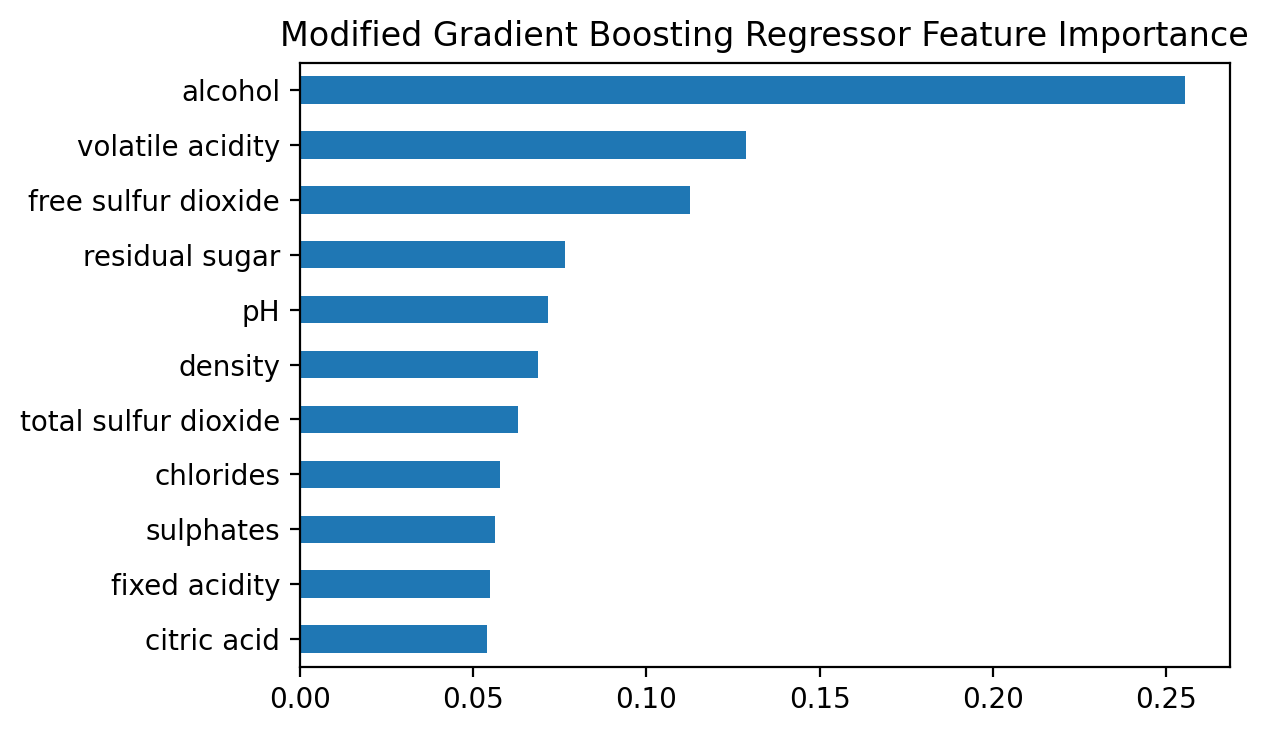

In [39]:
# View modified feature difference
modified_feature_importance = pd.Series(modified_gbr.feature_importances_, index=feature_labels)

modified_feature_importance.sort_values().plot(kind="barh")
plt.title('Modified Gradient Boosting Regressor Feature Importance')

In [3]:
# Visualizing the results

# Define metric labels
metric_labels = ["R", "MSE", "MAPE"]
source_labels = ["Paper 1", "Our Implementation", "Our Modification"]

# Training
train_scores = np.array([[0.7255, 0.3286, 0.0826], [0.3661, 0.4851, 0.0969], [0.9413, 0.0449, 0.0256]])

# Testing
test_scores = np.array([[0.6057, 0.3741, 0.0873], [0.2774, 0.6101, 0.1128], [0.446, 0.4679, 0.0889]])

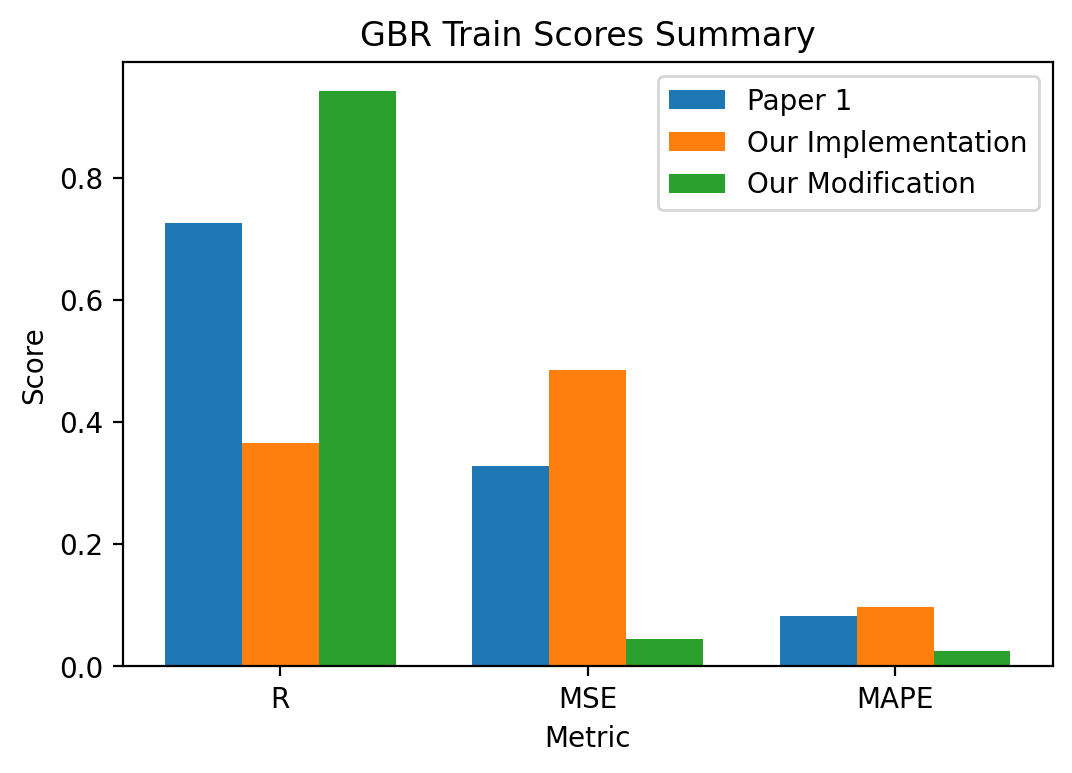

In [11]:
x = np.arange(len(metric_labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_scores[0], width, label=source_labels[0])
rects2 = ax.bar(x, train_scores[1], width, label=source_labels[1])
rects3 = ax.bar(x + width, train_scores[2], width, label=source_labels[2])

# Setting axes labels, title, and legend
ax.set_title('GBR Train Scores Summary')
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
ax.legend()

# Setting tick marks and month labels
ax.set_xticks(x)
ax.set_xticklabels(metric_labels, rotation=0)

plt.show()

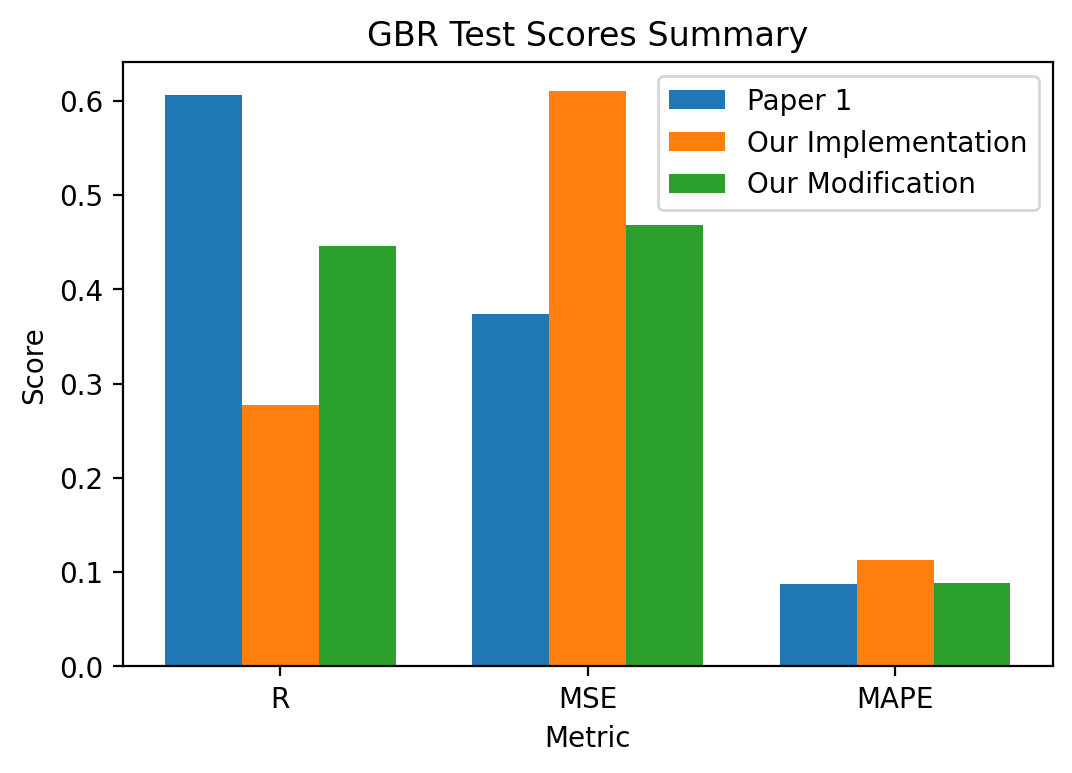

In [12]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, test_scores[0], width, label=source_labels[0])
rects2 = ax.bar(x, test_scores[1], width, label=source_labels[1])
rects3 = ax.bar(x + width, test_scores[2], width, label=source_labels[2])

# Setting axes labels, title, and legend
ax.set_title('GBR Test Scores Summary')
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
ax.legend()

# Setting tick marks and month labels
ax.set_xticks(x)
ax.set_xticklabels(metric_labels, rotation=0)

plt.show()